In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
a=pd.read_csv('bank-full.csv',sep=';')

In [3]:
a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
a.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
a.corr

<bound method DataFrame.corr of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [6]:
a.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [7]:
a.shape

(45211, 17)

In [8]:
a.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
a.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
a.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [50]:
#select columns
columns = ['age', 'balance', 'duration', 'campaign','y']
a_sel= a[columns]
a_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

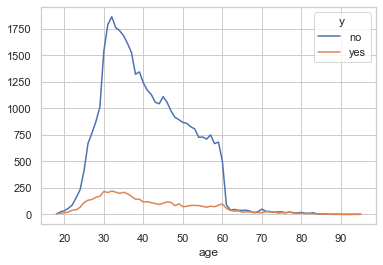

In [51]:
pd.crosstab(a_sel.age,a_sel.y).plot(kind="line")

<AxesSubplot:>

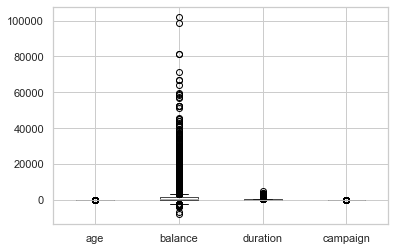

In [52]:
a_sel.boxplot()

In [53]:
a_sel['outcome'] = a_sel.y.map({'no':0,'yes':12})
a_sel.tail(10)

<ipython-input-53-80f5a6843dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_sel['outcome'] = a_sel.y.map({'no':0,'yes':12})


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,12
45202,34,557,224,1,yes,12
45203,23,113,266,1,yes,12
45204,73,2850,300,1,yes,12
45205,25,505,386,2,yes,12
45206,51,825,977,3,yes,12
45207,71,1729,456,2,yes,12
45208,72,5715,1127,5,yes,12
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


In [54]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X=a_sel[feature_col]
Y=a_sel[output_target]

In [55]:
classifier=LogisticRegression()

In [56]:
classifier.fit(X,Y)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [57]:
classifier.coef_

array([[ 7.69721526e-03,  3.72191064e-05,  3.54908897e-03,
        -1.39828304e-01]])

In [58]:
#probability values
classifier.predict_proba (X)

array([[0.8736739 , 0.1263261 ],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553764, 0.69446236],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [59]:
y_pred = classifier.predict(X)

In [60]:
y_pred

array([ 0,  0,  0, ..., 12,  0,  0], dtype=int64)

# eda2

In [11]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
a1=a.iloc[:,1:]

In [14]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data=a1.copy()

In [22]:
#select columns
columns = ['age', 'balance', 'duration', 'campaign','y']
data= a[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


# duplicates

In [23]:
#Count of duplicated rows
data[data.duplicated()].shape

(94, 5)

In [24]:
data

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


In [26]:
#Print the duplicated rows
data[data.duplicated()]

,age,balance,duration,campaign,y
1252,43,0,187,1,no
4586,34,0,150,1,no
4819,32,0,91,1,no
9056,36,0,174,1,no
10293,37,0,137,1,no
...,...,...,...,...,...
42505,46,0,155,1,no
43344,42,0,158,1,no
43608,48,0,85,1,no
44554,50,0,120,2,no


In [27]:
data_cleaned1=data.drop_duplicates()

In [28]:
data_cleaned1

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


In [31]:
#rename the Solar column
data_cleaned2 = data_cleaned1.rename({'campaign': 'Ca'}, axis=1)

In [32]:
data_cleaned2

,age,balance,duration,Ca,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


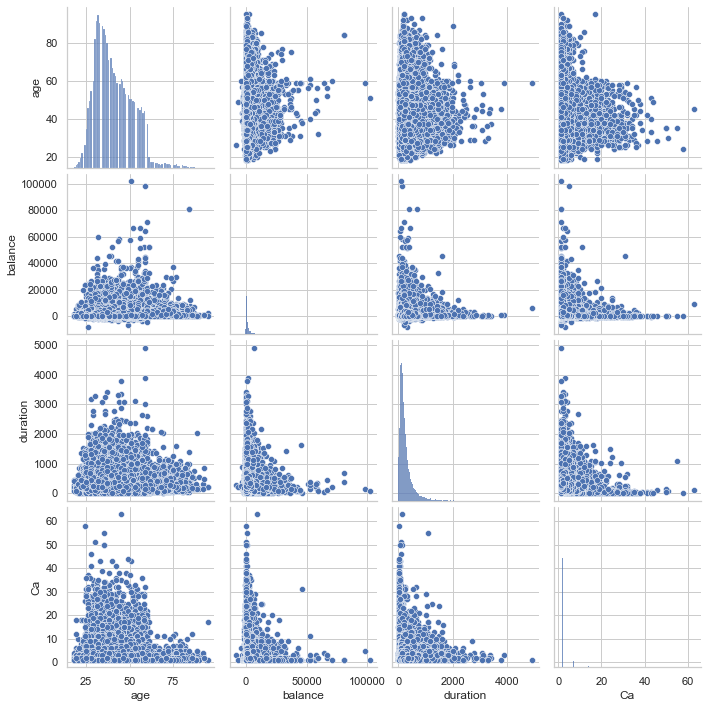

In [33]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned2)

In [35]:
#Correlation

data_cleaned2.corr()


,age,balance,duration,Ca
age,1.000000,0.097879,-0.004687,0.004666
balance,0.097879,1.000000,0.021114,-0.014892
duration,-0.004687,0.021114,1.000000,-0.084969
Ca,0.004666,-0.014892,-0.084969,1.000000


In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [72]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [73]:
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [76]:
(39342+854)/(39342+580+4435+854)*100

88.90756674260689

In [93]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
          12       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass pos_label=[ 0  0  0 ... 12  0  0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'True Positive Rate')

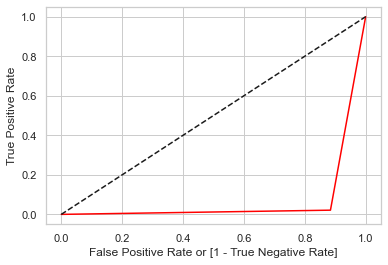

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, Y,y_pred)

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [100]:
auc

0.5734694329116669